## Proyecto Final
Integrantes:
- Miguel Nieto
- Jhan Utria
- Camilo Ruiz
- Hermann Blanco

Universidad del Norte - Estructura del Computador II

### Descripción del contexto.

Análisis exploratorio de Datos (EDA) del dataset *indian_prison.csv*, que contiene información sobre la población de prisioneros en la India de los años 2001 al 2013.

La descripción de las columnas del dataset es la siguiente:

|Columna |	Descripción |  
|--------|--------------|
|State_UT_name|Estado en donde se llevo el censo |   
|Year| año del censo|   
|Jail_Type|	Tipo de institución  | 
|year |	año de la observación|   
|Male_Convicts | Convictos masculinos|  
|Female_Convicts |	Convictos femeninos|  
|Total_Convicts|	Número total de convictos |  
|Male_Under_trial| 	Hombres bajo juicio  | 
|Female_Under_trial| Mujeres bajo juicio | 
|Total_Under_trial| Total de personas bajo juicio|
|Male_Detenues| detenidos masculinos|
|Female_Detenues|detenidos femeninos|
|Total_Detenues| total de detenidos|
|Male_Others| ocupantes masculinos bajo otra razón|
|Female_Others|ocupantes femeninos bajo otra razón|
|Total_Others|Número total de ocupantes bajo otra razón|
|Total_Male|Número total de ocupantes masculinos|
|Total_Female|Número total de ocupantes femeninos|
|Grand_Total| Número total de ocupantes|

In [1]:
import psycopg2

#establishing the connection
conn = psycopg2.connect(
   database='indian_prison_db', user='postgres', password='sa123456', host='postgresdb', port='5432'
)
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Preparing query to create a database
sql = '''COPY indian_prison(state_ut_name, year, jail_type, male_convicts, female_convicts, total_convicts, male_under_trial, female_under_trial, total_under_trial, male_detenues, female_detenues, total_detenues, male_others, female_others, total_others, total_male, total_female, grand_total)
FROM './poblacion_prision_india.csv'
DELIMITER ','
CSV HEADER;''';

#Creating a database
cursor.execute(sql)

records = cursor.fetchone()
for row in records:
    print(row)

#Closing the connection
conn.close()

UndefinedFile: could not open file "./poblacion_prision_india.csv" for reading: No such file or directory
HINT:  COPY FROM instructs the PostgreSQL server process to read a file. You may want a client-side facility such as psql's \copy.


### Ejercicio 1

Importa las librerias pandas, numpy, matplotlib y seaborn

#### Respuesta

In [1]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 2
Lea el archivo *poblacion_prision_india.csv* usando Pandas y guardelo en un dataframe.


In [24]:
df = pd.read_csv('poblacion_prision_india.csv')
arr = df.columns.values
arr = np.array(arr, dtype='str')
arr[3] = 'Male_Convicts'
a = np.char.lower(arr)
print(", ".join(a))

state_ut_name, year, jail_type, male_convicts, female_convicts, total_convicts, male_under_trial, female_under_trial, total_under_trial, male_detenues, female_detenues, total_detenues, male_others, female_others, total_others, total_male, total_female, grand_total


In [19]:
#cols_with_comma = ", ".join(df.columns)
cols_with_comma = [ f'{col} VARCHAR(50),' if i in [0, 2] else f'{col} INT,' for i, col in enumerate(df.columns)]
cols_with_comma = "\n".join(cols_with_comma) # Cambiar Male_Convicts
print(cols_with_comma)

State_UT_name VARCHAR(50),
Year INT,
Jail_Type VARCHAR(50),
Male Convicts INT,
Female_Convicts INT,
Total_Convicts INT,
Male_Under_trial INT,
Female_Under_trial INT,
Total_Under_trial INT,
Male_Detenues INT,
Female_Detenues INT,
Total_Detenues INT,
Male_Others INT,
Female_Others INT,
Total_Others INT,
Total_Male INT,
Total_Female INT,
Grand_Total INT,


In [22]:
query = f'''CREATE TABLE indian_prison (
id SERIAL PRIMARY KEY,
{cols_with_comma}
)'''
print(query)

CREATE TABLE indian_prison (
id SERIAL PRIMARY KEY,
State_UT_name VARCHAR(50),
Year INT,
Jail_Type VARCHAR(50),
Male Convicts INT,
Female_Convicts INT,
Total_Convicts INT,
Male_Under_trial INT,
Female_Under_trial INT,
Total_Under_trial INT,
Male_Detenues INT,
Female_Detenues INT,
Total_Detenues INT,
Male_Others INT,
Female_Others INT,
Total_Others INT,
Total_Male INT,
Total_Female INT,
Grand_Total INT,
)


### Ejercicio 3
Muestre los 10 primeros registros del dataframe
#### Respuesta

In [ ]:
df.head(10)

,State_UT_name,Year,Jail_Type,Male Convicts,Female_Convicts,Total_Convicts,Male_Under_trial,Female_Under_trial,Total_Under_trial,Male_Detenues,Female_Detenues,Total_Detenues,Male_Others,Female_Others,Total_Others,Total_Male,Total_Female,Grand_Total
0,Andhra Pradesh,2001,Central Jail,3372,3,3375,2718,114,2832,4,0,4,22,0,22,6116,117,6233
1,Andhra Pradesh,2001,District Jail,294,1,295,2379,136,2515,0,0,0,0,0,0,2673,137,2810
2,Andhra Pradesh,2001,Sub_Jail,188,10,198,3263,151,3414,0,0,0,0,0,0,3451,161,3612
3,Andhra Pradesh,2001,Women Jail,0,88,88,0,81,81,0,1,1,0,0,0,0,170,170
4,Andhra Pradesh,2001,Borstal School,17,0,17,0,0,0,0,0,0,0,0,0,17,0,17
5,Andhra Pradesh,2001,Open Jail,248,0,248,0,0,0,0,0,0,0,0,0,248,0,248
6,Andhra Pradesh,2001,Special Jail,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Andhra Pradesh,2001,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Andhra Pradesh,2001,Total,4119,102,4221,8360,482,8842,4,1,5,22,0,22,12505,585,13090
9,Andhra Pradesh,2002,Central Jail,4111,4,4115,3173,157,3330,2,0,2,0,0,0,7286,161,7447


### Ejercicio 4
¿Cuántas filas o registros y columnas tiene este dataset?

Imprima respuesta con un texto descriptivo
#### Respuesta

In [ ]:
print('El número de filas o registros es:', df.shape[0])
print('El número de columnas es:', df.shape[1])

El número de filas o registros es: 4023
El número de columnas es: 18


###Ejercicio 5
Muestre cada columna del dataframe con su respectiva tipología de dato y la cantidad de valores no nulos
####Respuesta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State_UT_name       4023 non-null   object
 1   Year                4023 non-null   int64 
 2   Jail_Type           4023 non-null   object
 3   Male Convicts       4023 non-null   int64 
 4   Female_Convicts     4023 non-null   int64 
 5   Total_Convicts      4023 non-null   int64 
 6   Male_Under_trial    4023 non-null   int64 
 7   Female_Under_trial  4023 non-null   int64 
 8   Total_Under_trial   4023 non-null   int64 
 9   Male_Detenues       4023 non-null   int64 
 10  Female_Detenues     4023 non-null   int64 
 11  Total_Detenues      4023 non-null   int64 
 12  Male_Others         4023 non-null   int64 
 13  Female_Others       4023 non-null   int64 
 14  Total_Others        4023 non-null   int64 
 15  Total_Male          4023 non-null   int64 
 16  Total_Female        4023

Dado que el dataset contiene 4023 filas y 18 columnas, si analizamos la información de la tabla anterior, es posible ver que el número de valores no nulos en todas las columnas del dataset es igual a la cantidad de filas del dataset, por ende, hay información 100% útil y el dataset es consistente.

### Ejercicio 6
Determine una conclusión con respecto al total de datos
### Respuesta

In [ ]:
df.describe()

,Year,Male Convicts,Female_Convicts,Total_Convicts,Male_Under_trial,Female_Under_trial,Total_Under_trial,Male_Detenues,Female_Detenues,Total_Detenues,Male_Others,Female_Others,Total_Others,Total_Male,Total_Female,Grand_Total
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.00000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,2007.044743,696.222222,25.858315,722.080537,1494.739249,63.540641,1558.279891,19.60875,0.955506,20.564256,32.651255,4.336068,36.987323,2243.221477,94.690529,2337.912006
std,3.747830,2089.082276,77.309287,2154.529877,4912.001653,189.353263,5088.164558,119.52509,8.536624,123.714471,458.132246,63.089692,511.008159,6732.986570,266.752259,6975.062947
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,2010.000000,126.500000,4.000000,150.000000,497.000000,25.000000,513.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,701.500000,37.500000,752.500000
max,2013.000000,27146.000000,963.000000,28051.000000,57017.000000,2349.000000,59058.000000,2244.00000,219.000000,2297.000000,11364.000000,1551.000000,12805.000000,81046.000000,3312.000000,83805.000000


En la tabla anterior, si deferenciamos los géneros con respecto a la categoría (Convictos, bajo juicio, detenidos, bajo otra razón), es posible concluir que los hombres superan a las mujeres en cantidad de casos. Esta conclusión fue dada observando el promedio (mean) de la tabla anterior



### Ejercicio 7
Grafique el recuento de personas por género, dependiendo del caso por el que estén en prisión.
#### Respuesta

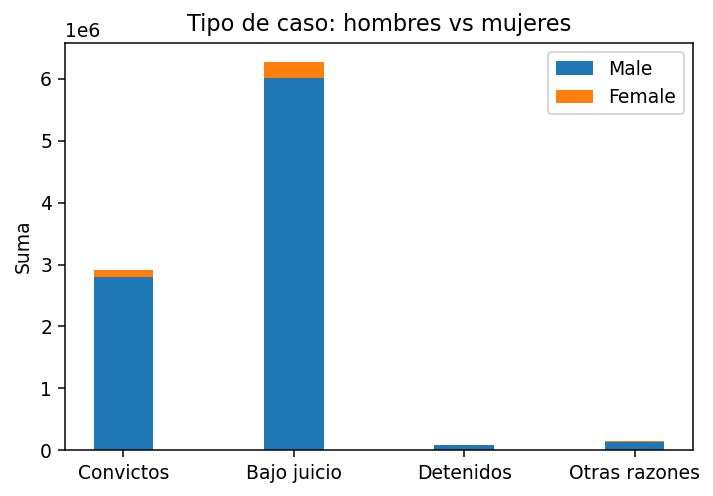

In [ ]:
labels = ['Convictos', 'Bajo juicio', 'Detenidos', 'Otras razones']
male = [df['Male Convicts'].sum(),
       df['Male_Under_trial'].sum(),
       df['Male_Detenues'].sum(),
       df['Male_Others'].sum()]

female = [df['Female_Convicts'].sum(),
         df['Female_Under_trial'].sum(),
         df['Female_Detenues'].sum(), 
         df['Female_Others'].sum()]
width = 0.35

fig, ax = plt.subplots(dpi = 135)

ax.bar(labels, male, width, label='Male')
ax.bar(labels, female, width, bottom=male, label='Female')

ax.set_ylabel('Suma')
ax.set_title('Tipo de caso: hombres vs mujeres')
ax.legend()

plt.show()

Por medio del anterior gráfico se apoya la afirmación del ejercicio anterior, indicando que la mayoría de ocupantes en las prisiones de India son hombres. 

Por otro lado, se puede mostrar la diferencia entre los casos de *Bajo juicio* y *Convictos* frente a *Detenidos* y *Otras razones*, teniendo los primeros una cantidad superior. Cabe resaltar que la mayoría de personas están bajo juicio, lo que puede dar posibilidad a que la cantidad de personas en prisión reduzcan dependiendo del resultado del juicio.

**NOTA**: Tener en cuenta que los valores del eje Y están a una escala de *1e6 = $10^6$*.

###Ejercicio 8
Calcule la cantidad de censos realizados por estado
####Respuesta

In [ ]:
yearwisegame = df.groupby('State_UT_name')['Jail_Type'].count().reset_index()
yearwisegame

,State_UT_name,Jail_Type
0,A & N Islands,117
1,Andhra Pradesh,117
2,Arunachal Pradesh,45
3,Assam,117
4,Bihar,117
5,Chandigarh,117
6,Chhatisgarh,9
7,Chhattisgarh,108
8,D & N Haveli,117
9,Daman & Diu,117


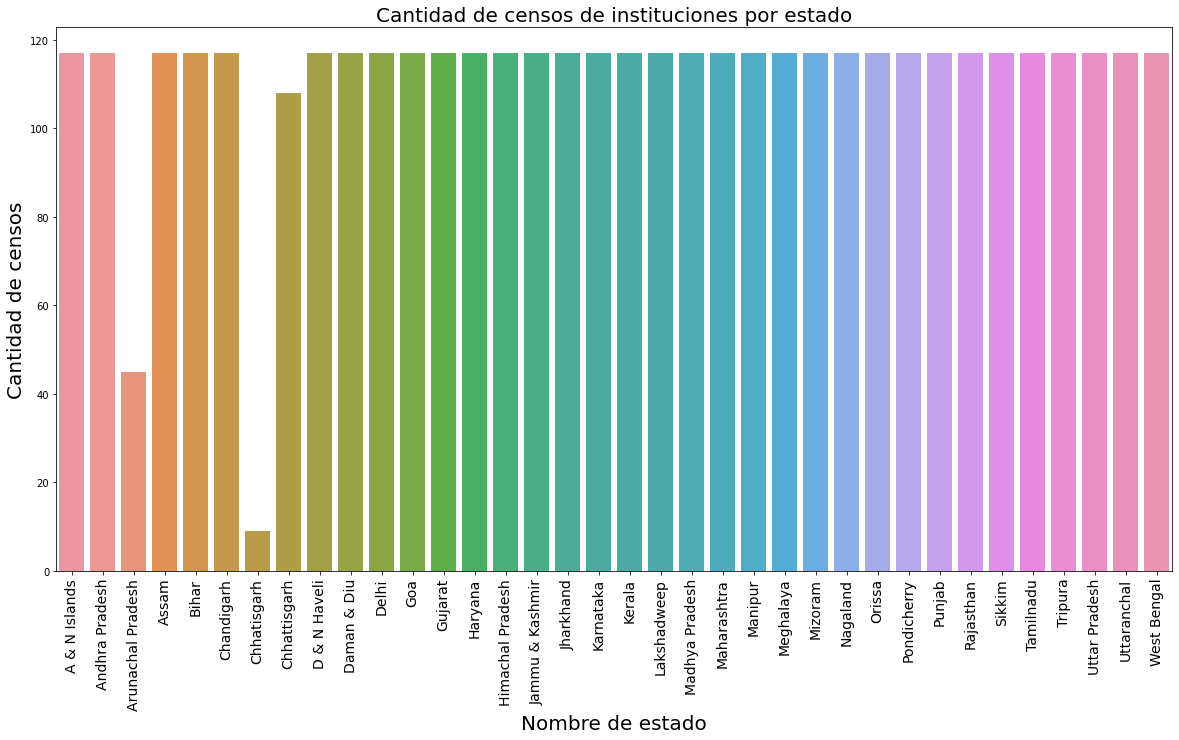

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(
    x=yearwisegame['State_UT_name'], 
    y=yearwisegame['Jail_Type']
).set_title('Cantidad de censos de instituciones por estado', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)

plt.ylabel('Cantidad de censos', fontsize = 20)
plt.xlabel('Nombre de estado', fontsize = 20);

Se puede observar en la gráfica que el número de instituciones por estado es 117 en 33 de los 36 estados encuestados. Lo que indica que este número es un parámetro preestablecido del censo y no representa necesariamente el número de instituciones de cada estado.

###Ejercicio 9
Determine una justificación para los estados que tienen menos instituciones censadas
####Respuesta

In [ ]:
df[df['State_UT_name'] =='Chhatisgarh'].groupby('Year').sum()

,Male Convicts,Female_Convicts,Total_Convicts,Male_Under_trial,Female_Under_trial,Total_Under_trial,Male_Detenues,Female_Detenues,Total_Detenues,Male_Others,Female_Others,Total_Others,Total_Male,Total_Female,Grand_Total
Year,,,,,,,,,,,,,,,
2013,12562,610,13172,17450,1032,18482,2,0,2,24,0,24,30038,1642,31680


El código anterior, muestra los datos del estado donde menos censos se realizaron. Y nos damos cuenta que este estado solo tiene censos del 2013, lo cual puede significar que las carceles solo funcionaron en 2013, lo cual no tendría mucho sentido. Sin embargo vemos que existe otro estado con el nombre *Chhattisgarh* tiene los siguientes datos



In [ ]:
df[df['State_UT_name'] =='Chhattisgarh'].groupby('Year').sum()

,Male Convicts,Female_Convicts,Total_Convicts,Male_Under_trial,Female_Under_trial,Total_Under_trial,Male_Detenues,Female_Detenues,Total_Detenues,Male_Others,Female_Others,Total_Others,Total_Male,Total_Female,Grand_Total
Year,,,,,,,,,,,,,,,
2001,9096,370,9466,9434,408,9842,8,0,8,16,2,18,18554,780,19334
2002,9668,404,10072,9472,450,9922,2,0,2,16,0,16,19158,854,20012
2003,9042,398,9440,7936,320,8256,6,0,6,20,0,20,17004,718,17722
2004,8640,410,9050,8286,388,8674,0,0,0,22,0,22,16948,798,17746
2005,8216,382,8598,10554,464,11018,4,0,4,22,0,22,18796,846,19642
2006,8174,374,8548,11578,568,12146,2,0,2,22,0,22,19776,942,20718
2007,8634,416,9050,11292,506,11798,0,0,0,54,0,54,19980,922,20902
2008,9146,388,9534,12310,604,12914,0,0,0,12,0,12,21468,992,22460
2009,9280,434,9714,13820,718,14538,0,0,0,32,0,32,23132,1152,24284


En esta tabla vemos que el estado de *Chhattisgarh* tiene información de censos en los años 2001 a 2012. Dado esto podemos concluir que el dataset puede presentar un error de registro cuando se hacen los censos en 2013, porque en efecto la cantidad de censos para el estado *Chhattisgarh* + la cantidad de censos para el estado *Chhatisgarh* es $108+9=117$, la cual es la cantidad estándar de censos

### Ejercicio 10
Muestre el comportamiento del número de personas en prisión, dependiendo el caso, a lo largo del tiempo.
#### Respuesta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


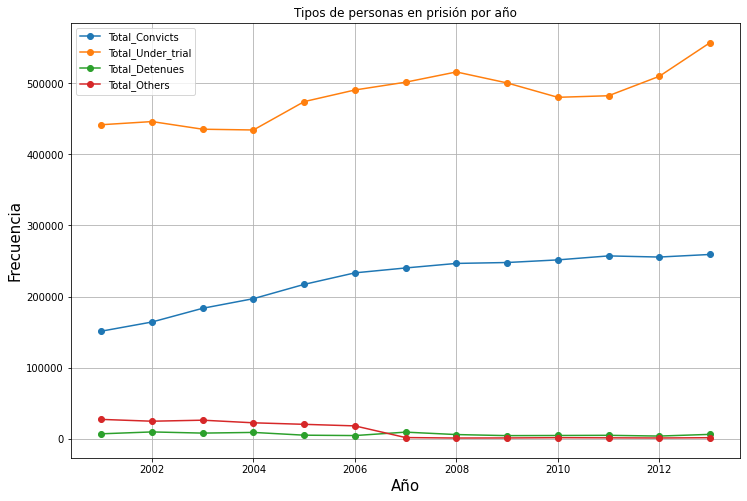

In [ ]:
casesbyyear = df.groupby('Year')['Total_Convicts', 'Total_Under_trial', 'Total_Detenues', 'Total_Others'].sum().reset_index()
casesbyyear.plot.line(figsize=(12, 8), grid='on', x = 'Year', marker = 'o')
plt.title('Tipos de personas en prisión por año')
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15);

El número de personas detenidas y bajo otras razones en prisión se ha mantenido a lo largo de los años mostrados [2001-2013], mientras que el número de personas convictas presenta un notable aumento en el tiempo. En cambio, las personas bajo juicio tienen un comportamiento inestable, aunque la tendencia general es ascendente.

### Ejercicio 11
Dado el caso anterior surge la duda en cuanto al comportamiento del número de personas en prisión en India a lo largo de los años. Por ende, grafique el polígono de frecuencias.
#### Respuesta

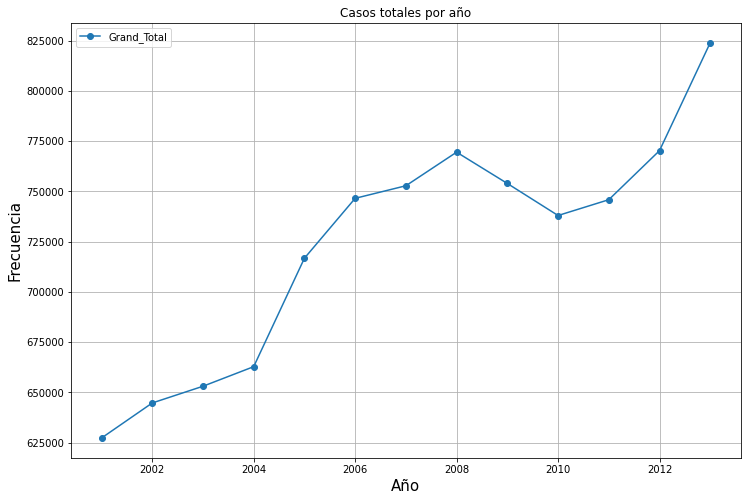

In [ ]:
totalbyyear = df.groupby('Year')['Grand_Total'].sum().reset_index()
totalbyyear.plot.line(figsize=(12, 8), grid='on', x = 'Year', marker='o')
plt.title('Casos totales por año')
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15);

La tendencia general es ascendente, aunque se puede notar que en el periodo del 2008 al 2010 se redujo el número de prisioneros en India. Lo cual complementa la inferencia del ejercicio anterior.

###Ejercicio 12
Calcule los mínimos y máximos prisioneros reportados en un año
####Respuesta

In [ ]:
r=df.groupby('Year')
f=r['Grand_Total'].sum()
valorMax=max(f)
valorMin=min(f)
print("Valor máximo de prisioneros en un año: ",valorMax)
print("Valor mínimo de prisioneros en un año: ",valorMin)

Valor máximo de prisioneros en un año:  823984
Valor mínimo de prisioneros en un año:  627270


###Ejercicio 13
Halle los años para los valores calculados anteriormente y concluya al respecto 
####Respuesta

In [ ]:
f.sort_values().reset_index().iloc[0]

Year             2001
Grand_Total    627270
Name: 0, dtype: int64

El año en el que se presenta menor cantidad de prisioneros es 2001

In [ ]:
f.sort_values().reset_index().iloc[-1]

Year             2013
Grand_Total    823984
Name: 12, dtype: int64

El año en el que se presenta menor cantidad de prisioneros es 2013

En conclusión, se confirma el aumento de prisioneros en el intervalo de los años censados explicado en un punto anterior

###Ejercicio 14
Realice un diagrama circular donde se vea que porcentaje está ocupando cada tipo de institución
####Respuesta

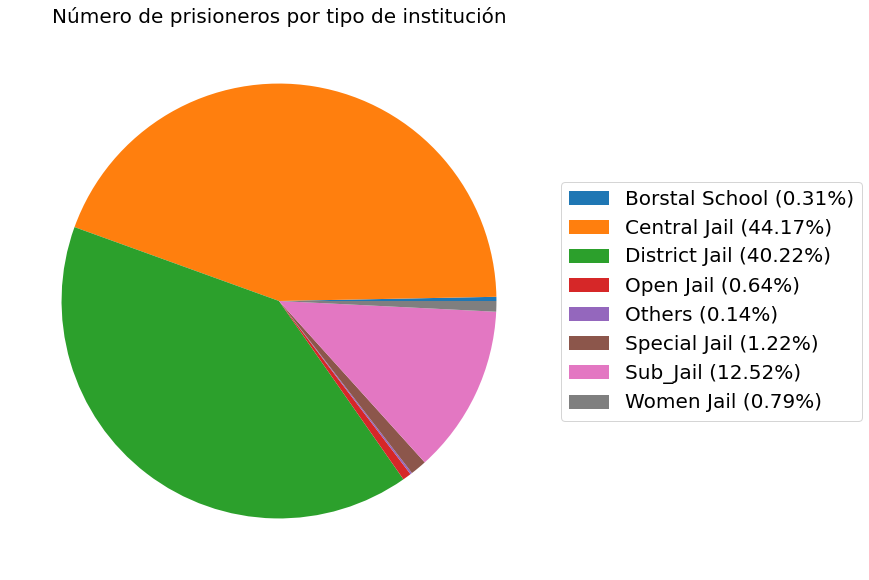

In [ ]:
f = df[df['Jail_Type'] !='Total'].groupby('Jail_Type')['Grand_Total'].sum()

total = f.sum()
table = f.reset_index()
legends = []
for i in table.index:
    legends.append(table['Jail_Type'][i] + " (" + "{0:.2f}".format(table['Grand_Total'][i]*100/total) + "%)")
f.plot.pie(labeldistance=None, figsize=(10, 10))
plt.legend(legends, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=20)
plt.ylabel("")
plt.title('Número de prisioneros por tipo de institución', fontsize=20);

Gracias a este gráfico es posible observar que la diferencia entre las instituciones "Central jail" y "District jail", contra el resto es bastante amplia. Se puede decir que la mayoría de presidiarios se encuentran en estas instituciones en los diferentes estados

### Ejercicio 15
Se ha visto que las mujeres tienen una menor presencia en las prisiones de India, entonces muestre el Top 5 de estados con menor número de mujeres.
#### Respuesta

In [ ]:
df.groupby('State_UT_name')['Total_Female'].sum().sort_values().head(5).reset_index()

,State_UT_name,Total_Female
0,Lakshadweep,2
1,D & N Haveli,32
2,Arunachal Pradesh,38
3,Daman & Diu,38
4,A & N Islands,104


### Ejercicio 16
Se ha demostrado que los hombres son la población mayoritaria las prisiones de India, por tanto, muestre el Top 5 de estados con mayor número de hombres.
#### Respuesta

In [ ]:
df.groupby('State_UT_name')['Total_Male'].sum().sort_values(ascending = False).head(5).reset_index()

,State_UT_name,Total_Male
0,Uttar Pradesh,1745280
1,Bihar,896746
2,Madhya Pradesh,794790
3,Maharashtra,609530
4,West Bengal,446798
